# Introduction to Apache Spark lab, Lab 2: Querying data
![image](https://hadoopi.files.wordpress.com/2014/10/screen-shot-2014-10-25-at-14-29-50.png?w=597&h=222)

This lab will show you how to work with the [SparkSQL](http://spark.apache.org/sql/) library.  It's meant to be self-guided, but don't hesitate to ask your presentor for help.  

This notebook guides you through querying data with Apache Spark, including how to create and use DataFrames, run SQL queries, apply functions to the results of SQL queries, join data from different data sources, and visualize data in graphs.

This notebook uses pySpark, the Python API for Spark. Some knowledge of Python is recommended. This notebook runs on Python 2 with Spark 2.0.

## Table of contents

1. [Prepare the environment and the data](#getstarted)<br>
     1.1 [Enable SQL processing](#sqlprocessing)<br>
     1.2 [Download the data](#download)<br>
     1.3 [Create a DataFrame](#createdf)<br>
     1.4 [Create a table](#createtab)<br>
2. [Run SQL queries](#runsql)<br>
    2.1 [Display query results with a pandas DataFrame](#pandas)<br>
    2.2 [Run a group by query](#groupby)<br>
    2.3 [Run a subselect query](#subselect)<br>
    2.4 [Return nested JSON field values](#nested)<br>
3. [Convert RDDs to DataFrames](#convertrdd)<br>
    3.1 [Create a simple RDD](#simplerdd)<br>
    3.2 [Apply a schema](#apply)<br>
    3.3 [Create rows with named columns](#namedcol)<br>
    3.4 [Join tables](#join)<br>
4. [Create SQL functions](#sqlfuncs)<br>
5. [Convert a pandas DataFrame to a Spark DataFrame](#sparkdf)<br>
    5.1 [Get a new data set](#ufo)<br>
    5.2 [Create a pandas DataFrame](#ufopandas)<br>
    5.3 [Convert to a Spark DataFrame](#sparkufo)<br>
    5.4 [Run an SQL statement](#runufo)<br>
6. [Visualize data](#viz)<br>
    6.1 [Create a chart](#vizchart)<br>
    6.2 [Aggregate the data](#vizagg)<br>
    6.3 [Create a better chart](#vizchart2)<br>
7. [Reading from an external source](#external)<br>
8. [Summary and next steps](#nextsteps)

<a id="getstarted"></a>
## 1. Getting started
Before you can run SQL queries on data in an Apache Spark environment, you need to enable SQL processing and then move the data to the structured format of a DataFrame
<a id="sqlprocessing"></a>
## 1.1 Create a [Spark Session](http://spark.apache.org/docs/latest/sql-programming-guide.html#starting-point-sparksession)
The preferred method to enable SQL processing with Spark 2.0 is to use the new SparkSession object, but you can also create a SQLContext object. <br>
<br/>
 <div class="panel-group" id="accordion-11">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-11" href="#collapse1-11">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-11" class="panel-collapse collapse">
      <div class="panel-body"><i>SparkSession</i> is not included by default.   You need to import it from <i>pyspark.sql</i></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-11" href="#collapse2-11">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-11" class="panel-collapse collapse">
      <div class="panel-body"><i>SparkSession</i> needs the builder method.</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-11" href="#collapse3-11">
        Solution</a>
      </h4>
    </div>
    <div id="collapse3-11" class="panel-collapse collapse">
      <div class="panel-body">Type:<br/>

from pyspark.sql import SparkSession<br/>
spark = SparkSession.builder.getOrCreate()<br/></div>
    </div>
  </div>
</div> 


In [1]:
# Import the SparkSQL library and connect to the current Spark context
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

<a id="download"></a>
## 1.2 - Download a JSON Recordset to work with
Let's download the data, we can run commands on the console of the server (or docker image) that the notebook environment is using. To do so we simply put a "!" in front of the command that we want to run. For example:

!pwd

To get the data we will download a file to the environment. Simple run these two commands, the first just ensures that the file is removed if it exists:

!rm world_bank.json.gz -f <br/>
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz<br/><br/>
 <div class="panel-group" id="accordion-12">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-12" href="#collapse1-12">
        Advanced Optional 1</a>
      </h4>
    </div>
    <div id="collapse1-12" class="panel-collapse collapse">
      <div class="panel-body">Comment out the rm statement i.e. #!rm and re-run this section.   What is the name of the downloaded file?</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-12" href="#collapse2-12">
        Advanced Optional 2</a>
      </h4>
    </div>
    <div id="collapse2-12" class="panel-collapse collapse">
      <div class="panel-body">Add !ls to see all the files currently in storage.   Try running !mkdir testdir</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-12" href="#collapse3-12">
        Advanced Optional 3</a>
      </h4>
    </div>
    <div id="collapse3-12" class="panel-collapse collapse">
      <div class="panel-body">Clean up all added files/directories.   Use !rmdir to remove a directory.</div>
    </div>
  </div>
</div> 


In [2]:
# Download file here
!rm world_bank.json.gz* -f
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz

--2017-09-19 17:07:42--  https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446287 (436K) [application/octet-stream]
Saving to: ‘world_bank.json.gz’

100%[======================================>] 446,287     --.-K/s   in 0.02s   

2017-09-19 17:07:42 (27.8 MB/s) - ‘world_bank.json.gz’ saved [446287/446287]



<a id="createdf"></a>
## 1.3 - Create a Dataframe 
<br/>
Use the SparkSession you created earlier to read the World Bank json data - <i>world_bank.json.gz</i> as a Dataframe</a><br><br>
 <div class="panel-group" id="accordion-13">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-13" href="#collapse1-13">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-13" class="panel-collapse collapse">
      <div class="panel-body">Use the <i>read</i> function to return a Dataframe reader</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-13" href="#collapse2-13">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-13" class="panel-collapse collapse">
      <div class="panel-body">Use the <i>json()</i> method in DataframeReader to read the file.   Note that the method handles a gzipped file format.</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-13" href="#collapse3-13">
        Solution</a>
      </h4>
    </div>
    <div id="collapse3-13" class="panel-collapse collapse">
      <div class="panel-body">To create the Dataframe type:<br>

example1_df = spark.read.json("world_bank.json.gz")<br></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-13" href="#collapse4-13">
        Advanced Optional</a>
      </h4>
    </div>
    <div id="collapse4-13" class="panel-collapse collapse">
      <div class="panel-body">Obtain the same result by using <i>textFile()</i> to read the file as RDD and then convert to a Dataframe</div>
    </div>
  </div>
</div> 


In [3]:
#Create the Dataframe here:
example1_df = spark.read.json("world_bank.json.gz")

#Advanced Solution
#example1_rdd = sc.textFile("world_bank.json.gz")
#example1_df = spark.read.json(example1_rdd)

 ### 1.3.1 - Show the Dataframe schema
 <br>
 <div class="panel-group" id="accordion-131">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-131" href="#collapse1-131">
        Solution</a>
      </h4>
    </div>
    <div id="collapse1-131" class="panel-collapse collapse">
      <div class="panel-body"><h3>We can look at the schema with this command:</h3>

Type: <br>
example1_df.printSchema()</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-131" href="#collapse2-131">
        Advanced Optional 1</a>
      </h4>
    </div>
    <div id="collapse2-131" class="panel-collapse collapse">
      <div class="panel-body">Get the dataframe columns.   Try using command-completion (use TAB after the .) to obtain the list of possible methods/values</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-131" href="#collapse3-131">
        Advanced Optional 2</a>
      </h4>
    </div>
    <div id="collapse3-131" class="panel-collapse collapse">
      <div class="panel-body">Convert the dataframe back to JSON and print the first value</div>
    </div>
  </div>
</div>

In [4]:
#Print out the schema
example1_df.printSchema()

#Advanced Option 1
#example1_df.columns

#Advanced Option 2
#example1_df.toJSON().first()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

### 1.3.2 - Using the Dataframe
<br/>
Dataframes are a subset of RDDs and can be similarly transformed.  You can map and filter them.
<br/>Take a look at the first two rows of data using the [take()](http://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=take#pyspark.sql.DataFrame.take) function.<br/>
<div class="panel-group" id="accordion-132">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-132" href="#collapse1-132">
        Solution</a>
      </h4>
    </div>
    <div id="collapse1-132" class="panel-collapse collapse">
      <div class="panel-body">example1_df.take(2)</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-132" href="#collapse2-132">
        Advanced Optional 1</a>
      </h4>
    </div>
    <div id="collapse2-132" class="panel-collapse collapse">
      <div class="panel-body"><i>take()</i> returns data as an RDD list of Row objects.   <i>show()</i> prints the objects to the console.   What is the default number of rows displayed?</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-132" href="#collapse3-132">
        Advanced Optional 2</a>
      </h4>
    </div>
    <div id="collapse3-132" class="panel-collapse collapse">
      <div class="panel-body">Save the table as a parquet table.   Use !ls to confirm it was saved.  Use a <i><a href="https://spark.apache.org/docs/1.6.2/api/python/pyspark.sql.html#pyspark.sql.DataFrameWriter"DataFrameWriter></a></i>  What did you see when you ran the ls command?</div>
    </div>
  </div>
</div> 
 



In [5]:
#Use take on the DataFrame to pull out 2 rows
example1_df.take(2)

#Advanced Option 1
#example1_df.show()

#Advanced Option 2
#example1_df.write.parquet('parquet_file')
#!ls -l parquet_file

[Row(_id=Row($oid=u'52b213b38594d8a2be17c780'), approvalfy=u'1999', board_approval_month=u'November', boardapprovaldate=u'2013-11-12T00:00:00Z', borrower=u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA', closingdate=u'2018-07-07T00:00:00Z', country_namecode=u'Federal Democratic Republic of Ethiopia!$!ET', countrycode=u'ET', countryname=u'Federal Democratic Republic of Ethiopia', countryshortname=u'Ethiopia', docty=u'Project Information Document,Indigenous Peoples Plan,Project Information Document', envassesmentcategorycode=u'C', grantamt=0, ibrdcommamt=0, id=u'P129828', idacommamt=130000000, impagency=u'MINISTRY OF EDUCATION', lendinginstr=u'Investment Project Financing', lendinginstrtype=u'IN', lendprojectcost=550000000, majorsector_percent=[Row(Name=u'Education', Percent=46), Row(Name=u'Education', Percent=26), Row(Name=u'Public Administration, Law, and Justice', Percent=16), Row(Name=u'Education', Percent=12)], mjsector_namecode=[Row(code=u'EX', name=u'Education'), Row(code=u'EX', name=u'

<a id="createtab"></a>
## 1.4 - Register a Temp Table
<br/>
SQL works on tables.   Currently we have data in a dataframe, but we have no table identifier for it.   Thus, we want to create a temporary table reference that refers to this dataframe.
<br/><br/>
<div class="panel-group" id="accordion-14">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-14" href="#collapse1-14">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-14" class="panel-collapse collapse">
      <div class="panel-body">The function is: DataframeObject.createTempView("name_of_table")<br>
Create a table named "world_bank"<br/></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-14" href="#collapse2-14">
        Solution</a>
      </h4>
    </div>
    <div id="collapse2-14" class="panel-collapse collapse">
      <div class="panel-body">example1_df.createTempView("world_bank")</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-14" href="#collapse3-14">
        Advanced Optional 1</a>
      </h4>
    </div>
    <div id="collapse3-14" class="panel-collapse collapse">
      <div class="panel-body">You'll need to create a [catalog](http://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=catalog#pyspark.sql.SparkSession.catalog) object</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-14" href="#collapse4-14">
        Advanced Optional 2</a>
      </h4>
    </div>
    <div id="collapse4-14" class="panel-collapse collapse">
      <div class="panel-body">Try creating a second temporary table on the same dataframe.   What does <i>listTables()</i> return?</div>
    </div>
  </div>
    <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-14" href="#collapse5-14">
        Advanced Optional 3</a>
      </h4>
    </div>
    <div id="collapse5-14" class="panel-collapse collapse">
      <div class="panel-body">Drop the additional temp table.   What does <i>listTables()</i> return?</div>
    </div>
  </div>
</div>



In [6]:
#Create the table to be referenced via SparkSQL
example1_df.createTempView("world_bank")

#Advanced Optional 1
#catalog = spark.catalog
#print(catalog.listTables())

#Advanced Optional 2
#example1_df.createTempView("world_bank1")
#print(catalog.listTables())

#Advanced Optional 2
#catalog.dropTempView("world_bank1");
#catalog.listTables()

<a id="runsql"></a>
## 2 - Writing SQL Statements
<br>
Write SQL statements to return two rows from the world_bank table.
<br>
 <div class="panel-group" id="accordion-2">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-2" href="#collapse1-2">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-2" class="panel-collapse collapse">
      <div class="panel-body">Use the <i>sql()</i> method on your SparkSession</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-2" href="#collapse2-2">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-2" class="panel-collapse collapse">
      <div class="panel-body">Use <i>limit</i> (i.e. <i>limit 2</i>) within your SQL statement to limit the number of rows returned.   Use <i>show()</i> to display the values.</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-2" href="#collapse3-2">
        Solution</a>
      </h4>
    </div>
    <div id="collapse3-2" class="panel-collapse collapse">
      <div class="panel-body">Type:<br>
      spark.sql("select * from world_bank limit 2").show()<br></div>
    </div>
  </div>
</div> 


In [7]:
#Use SQL to query the table and print the output
spark.sql("select * from world_bank limit 2").show()

+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+--------------------+----------------+--------------------+------------------------+--------+-----------+-------+----------+--------------------+--------------------+----------------+---------------+--------------------+--------------------+--------------------+--------------------+-----------+--------+--------------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+------+------+--------------------+--------------------+--------------------+---------+---------+------------+--------------------+
|                 _id|approvalfy|board_approval_month|   boardapprovaldate|            borrower|         closingd

###  Writing SQL Statements
<br>
Try writing the next four sections yourself first.   Each hint contains the solution for that section.   We provide this here because this is more SQL than Spark and not everyone is familar with SQL.  Nor is this an SQL class!
<br><br>
 <div class="panel-group" id="accordion-21">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-21" href="#collapse1-21">
        Solution 2.1</a>
      </h4>
    </div>
    <div id="collapse1-21" class="panel-collapse collapse">
      <div class="panel-body">spark.sql("select &#42; from world_bank limit 2").toPandas()</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-21" href="#collapse2-21">
        Solution 2.2</a>
      </h4>
    </div>
    <div id="collapse2-21" class="panel-collapse collapse">
      <div class="panel-body">spark.sql("select regionname, count(&#42;) as regioncount from world_bank group by regionname order by regioncount desc").toPandas()</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-21" href="#collapse3-21">
        Solution 2.3</a>
      </h4>
    </div>
    <div id="collapse3-21" class="panel-collapse collapse">
      <div class="panel-body"><pre>query = """
select \* from
    (select
        regionname ,
        count(\*) as project_count
    from world_bank
    group by regionname 
    order by count(\*) desc) table_alias
limit 2
"""

sqlContext.sql(query).toPandas()</pre></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-21" href="#collapse4-21">
        Solution 2.4</a>
      </h4>
    </div>
    <div id="collapse4-21" class="panel-collapse collapse">
      <div class="panel-body">spark.sql("select sector.Name from world_bank limit 5").toPandas()</div>
    </div>
  </div>
</div> 

<a id="pandas"></a>
## 2.1 - Use Pandas to display the results

In [8]:
# Take the DataFrame you created with the two records and convert it into a Pandas DataFrame

spark.sql("select * from world_bank limit 2").toPandas()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,"(52b213b38594d8a2be17c780,)",1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"(Education for all, 100)","[(65, Education for all)]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,"(52b213b38594d8a2be17c781,)",2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,None,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"(Other economic management, 30)","[(24, Other economic management), (54, Social ...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


<a id="groupby"></a>
## 2.2 - Use group by and order by to query the data

In [9]:
# Now calculate a simple count based on a group, for example "regionname".   Return the regionname and a count of the values for that regionname.
# optionally order the results in descending order

spark.sql("select regionname, count(*) as regioncount from world_bank group by regionname order by regioncount desc").toPandas()

,regionname,regioncount
0,Africa,152
1,East Asia and Pacific,100
2,Europe and Central Asia,74
3,South Asia,65
4,Middle East and North Africa,54
5,Latin America and Caribbean,53
6,Other,2


<a id="subselect"></a>
## 2.3 - Use a subselect query 

In [10]:
# run a subselect query
# Calculate a count of projects by region using a subselect
# Encase the query inside of the query string
# Display the result using Pandas

query = """
select * from
    (select
        regionname ,
        count(*) as project_count
    from world_bank
    group by regionname 
    order by project_count desc) table_alias
limit 2
"""
spark.sql(query).toPandas()

,regionname,project_count
0,Africa,152
1,East Asia and Pacific,100


<a id="nested"></a>
## 2.4 - Use the JSON schema to select based on a nested JSON column

In [11]:
# With JSON data you can reference the nested data.  
# If you look at the Schema in Step 1.3.1 above you can see that sector.Name is a nested column.
# Select that column and limit to a reasonable output (say five rows)

spark.sql("select sector.Name from world_bank limit 5").toPandas()

,Name
0,"[Primary education, Secondary education, Publi..."
1,"[Public administration- Other social services,..."
2,[Rural and Inter-Urban Roads and Highways]
3,[Other social services]
4,"[General industry and trade sector, Other indu..."


<a id="convertrdd"></a>
## 3. Convert RDDs to DataFrames
If you want to run SQL queries on an existing RDD, you must convert the RDD to a DataFrame. The main difference between RDDs and DataFrames is whether the columns are named.

You'll create an RDD and then convert it to a DataFrame in two different ways:
 - [Apply a schema](#apply)
 - [Create rows with named columns](#namedcol)

<a id="simplerdd"></a>
### 3.1 Create a simple RDD
You'll create a simple RDD with an ID column and two columns of random numbers.

First create a Python list of lists:

In [12]:
import random

data_e2 = []
for x in range(1,6):
    random_int = int(random.random() * 10)
    data_e2.append([x, random_int, random_int^2])
    


Now create the RDD and display it:
<br/>
<div class="panel-group" id="accordion-31">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-31" href="#collapse1-31">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-31" class="panel-collapse collapse">
      <div class="panel-body">sc.parallelize()</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-31" href="#collapse2-31">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-31" class="panel-collapse collapse">
      <div class="panel-body">Parallelized objects need to be collected.   Use collect()</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-31" href="#collapse3-31">
        Solution</a>
      </h4>
    </div>
    <div id="collapse3-31" class="panel-collapse collapse">
      <div class="panel-body">rdd_example2 = sc.parallelize(data_e2)<br>
print rdd_example2.collect()</div>
    </div>
  </div>
</div> 
 

In [13]:
rdd_example2 = sc.parallelize(data_e2)
print rdd_example2.collect()

[[1, 4, 6], [2, 9, 11], [3, 7, 5], [4, 6, 4], [5, 6, 4]]


<a id="apply"></a>
### 3.2 Apply a schema
You'll use the `StructField` method to create a schema object that's based on a string, apply the schema to the RDD to create a DataFrame, and then create a table to run SQL queries on.

Define your schema columns as a string:

In [14]:
from pyspark.sql.types import *

schemaString = "ID VAL1 VAL2"

Assign header information with the `StructField` method and create the schema with the `StructType` method:

In [15]:
fields = [StructField(field_name, StringType(), True) for field_name in schemaString.split()]
schema = StructType(fields)

Apply the schema to the RDD with the createDataFrame() method and save it to the schemaExample variable:
<br/>
<div class="panel-group" id="accordion-32">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-32" href="#collapse1-32">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-32" class="panel-collapse collapse">
      <div class="panel-body">createDataFrame() can be invoked from the SparkSession context</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-32" href="#collapse2-32">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-32" class="panel-collapse collapse">
      <div class="panel-body">createDataFrame(rdd,schema)</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-32" href="#collapse3-32">
        Solution</a>
      </h4>
    </div>
    <div id="collapse3-32" class="panel-collapse collapse">
      <div class="panel-body">schemaExample = spark.createDataFrame(rdd_example2, schema)</div>
    </div>
  </div>
</div> 

In [16]:
schemaExample = spark.createDataFrame(rdd_example2, schema)

Register the DataFrame as a table:

In [17]:
schemaExample.registerTempTable("example2")

View the data:

In [18]:
print schemaExample.collect()

[Row(ID=u'1', VAL1=u'4', VAL2=u'6'), Row(ID=u'2', VAL1=u'9', VAL2=u'11'), Row(ID=u'3', VAL1=u'7', VAL2=u'5'), Row(ID=u'4', VAL1=u'6', VAL2=u'4'), Row(ID=u'5', VAL1=u'6', VAL2=u'4')]


You can reference the columns names in DataFrames

In [19]:
for row in schemaExample.take(2):
    print row.ID, row.VAL1, row.VAL2

1 4 6
2 9 11


Run a simple SQL query:

In [20]:
spark.sql("select * from example2").toPandas()

,ID,VAL1,VAL2
0,1,4,6
1,2,9,11
2,3,7,5
3,4,6,4
4,5,6,4


<a id="namedcol"></a>
### 3.3 Create rows with named columns
You'll create an RDD with named columns and then convert it to a DataFrame and a table.

Create a new RDD and specify the names of the columns with the `map` method:

In [21]:
from pyspark.sql import Row

rdd_example3 = rdd_example2.map(lambda x: Row(id=x[0], val1=x[1], val2=x[2]))

print rdd_example3.collect()            

[Row(id=1, val1=4, val2=6), Row(id=2, val1=9, val2=11), Row(id=3, val1=7, val2=5), Row(id=4, val1=6, val2=4), Row(id=5, val1=6, val2=4)]


Convert `rdd_example3` to a DataFrame and register an associated table:
<br/>
<div class="panel-group" id="accordion-33">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-33" href="#collapse1-33">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-33" class="panel-collapse collapse">
      <div class="panel-body">toDF() can be invoked on an RDD to convert it to a dataframe</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-33" href="#collapse2-33">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-33" class="panel-collapse collapse">
      <div class="panel-body">registerTempTable(<name>) is used to register temp tables</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-33" href="#collapse3-33">
        Solution</a>
      </h4>
    </div>
    <div id="collapse3-33" class="panel-collapse collapse">
      <div class="panel-body">df_example3 = rdd_example3.toDF()<br>
df_example3.registerTempTable("example3")</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-34" href="#collapse3-34">
        Advanced Optional</a>
      </h4>
    </div>
    <div id="collapse3-34" class="panel-collapse collapse">
      <div class="panel-body">Display the list of tables using the catalog attribute on the spark object</div>
    </div>
  </div>
</div> 

In [22]:
df_example3 = rdd_example3.toDF()
df_example3.registerTempTable("example3")
spark.catalog.listTables()

[Table(name=u'example2', database=None, description=None, tableType=u'TEMPORARY', isTemporary=True),
 Table(name=u'example3', database=None, description=None, tableType=u'TEMPORARY', isTemporary=True),
 Table(name=u'world_bank', database=None, description=None, tableType=u'TEMPORARY', isTemporary=True)]

Run a simple SQL query:

In [23]:
spark.sql("select * from example3").toPandas()

,id,val1,val2
0,1,4,6
1,2,9,11
2,3,7,5
3,4,6,4
4,5,6,4


<a id="join"></a>
### 3.4 Join tables
You can join tables.

Join tables `example2` and `example3` on the ID column:

In [24]:
query = """
select
    *
from
    example2 e2
inner join example3 e3 on
    e2.ID = e3.id
"""

print spark.sql(query).toPandas()

  ID VAL1 VAL2  id  val1  val2
0  1    4    6   1     4     6
1  4    6    4   4     6     4
2  3    7    5   3     7     5
3  2    9   11   2     9    11
4  5    6    4   5     6     4


Alternatively, you can join DataFrames with a Dataframe API instead of an SQL query:

In [25]:
df_example4 = df_example3.join(schemaExample, schemaExample["ID"] == df_example3["id"] )

for row in df_example4.take(5):
    print row

Row(id=1, val1=4, val2=6, ID=u'1', VAL1=u'4', VAL2=u'6')
Row(id=4, val1=6, val2=4, ID=u'4', VAL1=u'6', VAL2=u'4')
Row(id=3, val1=7, val2=5, ID=u'3', VAL1=u'7', VAL2=u'5')
Row(id=2, val1=9, val2=11, ID=u'2', VAL1=u'9', VAL2=u'11')
Row(id=5, val1=6, val2=4, ID=u'5', VAL1=u'6', VAL2=u'4')


<a id="sqlfuncs"></a>
## 4. Create SQL functions 
You can create functions that run in SQL queries. 

First, create a Python function and test it:

In [26]:
def simple_function(v):
    return int(v * 10)

#test the function
print simple_function(3)

30


Next, register the function as an SQL function with the registerFunction() method - in this case we do need to use sqlContext since the SparkSession object does not support this function:
<br/>
<div class="panel-group" id="accordion-4">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-4" href="#collapse1-4">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-4" class="panel-collapse collapse">
      <div class="panel-body">registerFunction() is invoked from the SQL Context</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-4" href="#collapse2-4">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-4" class="panel-collapse collapse">
      <div class="panel-body">registerFunction(function name, function)</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-4" href="#collapse3-4">
        Solution</a>
      </h4>
    </div>
    <div id="collapse3-4" class="panel-collapse collapse">
      <div class="panel-body">sqlContext.registerFunction("simple_function", simple_function)</div>
    </div>
  </div>
</div> 

In [27]:
sqlContext.registerFunction("simple_function", simple_function)


Now run the function in an SQL Statement:

In [28]:
query = """
select
    ID,
    VAL1,
    VAL2,
    simple_function(VAL1) as s_VAL1,
    simple_function(VAL2) as s_VAL2
from
 example2
"""
spark.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,4,6,4444444444,6666666666
1,2,9,11,9999999999,11111111111111111111
2,3,7,5,7777777777,5555555555
3,4,6,4,6666666666,4444444444
4,5,6,4,6666666666,4444444444


The values in the VAL1 and VAL2 columns look like strings (10 characters instead of a number multiplied by 10). That's because string is the default data type for columns in Spark DataFrames.
Cast the values in the VAL1 and VAL2 columns to integers:

In [29]:
query = """
select
    ID,
    VAL1,
    VAL2,
    simple_function(cast(VAL1 as int)) as s_VAL1,
    simple_function(cast(VAL2 as int)) as s_VAL2
from
 example2
"""
spark.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,4,6,40,60
1,2,9,11,90,110
2,3,7,5,70,50
3,4,6,4,60,40
4,5,6,4,60,40


That looks better!

<a id="sparkdf"></a>
## 5. Convert a pandas DataFrame to a Spark DataFrame
Although pandas DataFrames display data in a friendlier format, Spark DataFrames can be faster and more scalable.

You'll get a new data set, create a pandas DataFrame for it, and then convert the pandas DataFrame to a Spark DataFrame.

<a id="ufo"></a>
### 5.1 Get a new data set
Get a data set about UFO sightings:

In [30]:
!rm SIGHTINGS.csv
!wget https://raw.githubusercontent.com/jpatter/SparkPOT/master/Lab-2/data/SIGHTINGS.csv

--2017-09-19 17:08:15--  https://raw.githubusercontent.com/jpatter/SparkPOT/master/Lab-2/data/SIGHTINGS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15893 (16K) [text/plain]
Saving to: ‘SIGHTINGS.csv’

100%[======================================>] 15,893      --.-K/s   in 0.001s  

2017-09-19 17:08:15 (20.8 MB/s) - ‘SIGHTINGS.csv’ saved [15893/15893]



<a id="ufopandas"></a>
### 5.2 Create a pandas DataFrame
Create a pandas DataFrame of the data set with the `read_csv` method:

In [31]:
import pandas as pd

pandas_df = pd.read_csv("./SIGHTINGS.csv")
pandas_df.head()

,Reports,Count
0,2/28/2017 0:00,269
1,1/31/2017 0:00,310
2,12/31/2016 0:00,333
3,11/30/2016 0:00,480
4,10/31/2016 0:00,473


<a id="sparkufo"></a>
### 5.3 Convert to a Spark DataFrame
Convert the pandas DataFrame to a Spark DataFrame with the `createDataFrame` method. Remember using the `createDataFrame` method to convert an RDD to a Spark DataFrame?

In [32]:
spark_df = spark.createDataFrame(pandas_df)

Print the first two rows:

In [33]:
for row in spark_df.take(2):
    print row

Row(Reports=u'2/28/2017 0:00', Count=269)
Row(Reports=u'1/31/2017 0:00', Count=310)


Register the Spark DataFrame as a table:

In [34]:
spark_df.registerTempTable("ufo_sightings")

<a id="runufo"></a>
### 5.4 Run an SQL statement
Now run an SQL statement to print the first 10 rows of the table:
<br/>
<div class="panel-group" id="accordion-54">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-54" href="#collapse1-54">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-54" class="panel-collapse collapse">
      <div class="panel-body">SQL statements can be run from the spark object</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-54" href="#collapse2-54">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-54" class="panel-collapse collapse">
      <div class="panel-body">print spark.sql("select * from ufo_sightings limit 10")</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-54" href="#collapse3-54">
        Solution</a>
      </h4>
    </div>
    <div id="collapse3-54" class="panel-collapse collapse">
      <div class="panel-body">print spark.sql("select &#42; from ufo_sightings limit 10").collect()</div>
    </div>
  </div>
</div> 

In [35]:
print spark.sql("select * from ufo_sightings limit 10").collect()

[Row(Reports=u'2/28/2017 0:00', Count=269), Row(Reports=u'1/31/2017 0:00', Count=310), Row(Reports=u'12/31/2016 0:00', Count=333), Row(Reports=u'11/30/2016 0:00', Count=480), Row(Reports=u'10/31/2016 0:00', Count=473), Row(Reports=u'9/30/2016 0:00', Count=583), Row(Reports=u'8/31/2016 0:00', Count=543), Row(Reports=u'7/31/2016 0:00', Count=674), Row(Reports=u'6/30/2016 0:00', Count=419), Row(Reports=u'5/31/2016 0:00', Count=377)]


<a id="viz"></a>
## 6. Visualize data
It's easy to create charts from pandas DataFrames. You'll use the matplotlib library to create graphs and the NumPy package for computing.

Import the libraries and specify to show graphs inline:

In [36]:
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

Convert the Spark DataFrame with UFO data to a pandas DataFrame:

In [37]:
ufos_df = spark_df.toPandas()

<a id="vizchart"></a>
### 6.1 Create a chart

To create a chart, you call the `plot()` method and specify the type of chart, the columns for the X and Y axes, and, optionally, the size of the chart. 

For more information about plotting pandas DataFrames, see [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

Create a bar chart 12" wide by 5" high that shows the number of reports by date:
<br/>
<div class="panel-group" id="accordion-61">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-61" href="#collapse1-61">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-61" class="panel-collapse collapse">
      <div class="panel-body">plot() is run from the dataframe you wish to use</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-61" href="#collapse2-61">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-61" class="panel-collapse collapse">
      <div class="panel-body">ufos_df.plot(kind='',x='',y='',figsize=())</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-61" href="#collapse3-61">
        Solution</a>
      </h4>
    </div>
    <div id="collapse3-61" class="panel-collapse collapse">
      <div class="panel-body">ufos_df.plot(kind='bar', x='Reports', y='Count', figsize=(12, 5))</div>
    </div>
  </div>
</div> 

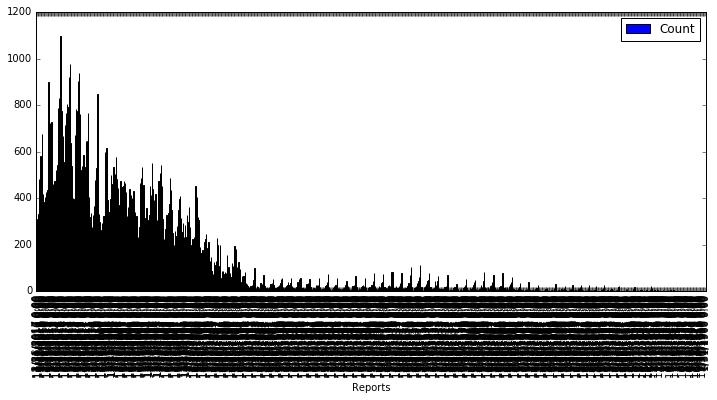

In [38]:
ufos_df.plot(kind='bar', x='Reports', y='Count', figsize=(12, 5))

This chart doesn't look good because there are too many observations. Check how many observations there are by querying the ufo_sightings table:

In [39]:
print spark.sql("select count(*) from ufo_sightings").collect()

[Row(count(1)=874)]


## <a id="vizagg"></a>
### 6.2 Aggregate the data

To reduce the number of data points on the chart, you can aggregate the data by year. Here are a few of the ways that you can do that:

 - Run an SQL query on the Reports column to output the year, and then run a group by operation on the year.
 - Create a simple Python function to aggregate by year, and then run the function in an SQL query.
 - Run the `map()` method on the Spark Dataframe to append a new column that contains the aggregated count by year. This is the method you'll use.

Remember that the dates in the Reports column look like this: 2/28/2017. Therefore, to create the year column, you just need the last 4 characters from the Reports column.

Add a year column to the DataFrame:

In [40]:
ufos_df = spark_df.rdd.map(lambda x: Row(**dict(x.asDict(), year=int(x.Reports[-9:-5])))).toDF()

Check to verify that you get the expected results:

In [41]:
print ufos_df.take(5)

[Row(Count=269, Reports=u'2/28/2017 0:00', year=2017), Row(Count=310, Reports=u'1/31/2017 0:00', year=2017), Row(Count=333, Reports=u'12/31/2016 0:00', year=2016), Row(Count=480, Reports=u'11/30/2016 0:00', year=2016), Row(Count=473, Reports=u'10/31/2016 0:00', year=2016)]


Register the DataFrame as a table:

In [42]:
ufos_df.registerTempTable("ufo_withyear")

<a id="vizchart2"></a>
### 6.3 Create a better chart

Now run an SQL query to group by year, order by year, and filter to the last 66 years. Then create a pandas DataFrame for the results and create a chart of the number of reports by year.

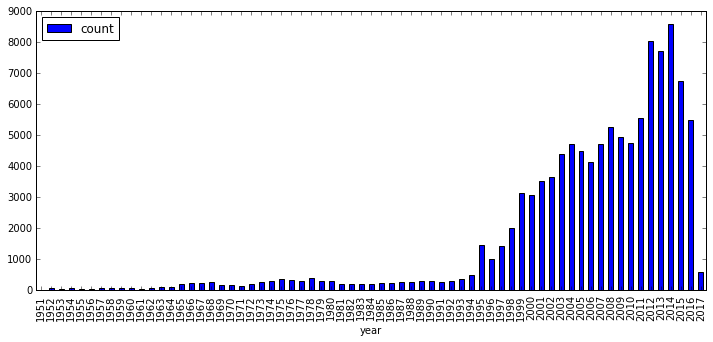

In [43]:
query = """
select 
    sum(Count) as count, 
    year 
from ufo_withyear
where year > 1950
group by year
order by year
"""
pandas_ufos_withyears = spark.sql(query).toPandas()
pandas_ufos_withyears.plot(kind='bar', x='year', y='count', figsize=(12, 5))

Now you have a chart that you can read. Look back at the original chart and notice that it wasn't ordered ascending by year.

<a id="external"></a>
## 7 - Reading from an external data source
If you have time, this is a good example to show you how to read from other datasources.  <br><br>
In a different browser tab, create a dashDB service, add credentials and come back to this notebook. <br>If you are using Data Science Experience, you need to log into Bluemix and create a dashDB instance.   The login and password should be the same as for DSE.<br>
Each dashDB instance in Bluemix is created with a "GOSALES" set of tables which we can reuse for the purpose of this example.  For example GOSALES.BRANCH. (You can create your own tables if you wish...)<br><br>Replace the Xs in the cell below with proper credentials and verify access to dashDB tables.<br><br>
You can read from any database that you can connect to through jdbc.  Here is the [documentation](http://spark.apache.org/docs/latest/sql-programming-guide.html#jdbc-to-other-databases)
<br><br>
 <div class="panel-group" id="accordion-8">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-8" href="#collapse1-8">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-8" class="panel-collapse collapse">
      <div class="panel-body">To connect to a general dashDB instance:<br>
      host=""<br>
user=""<br>
password=""<br>
connection="jdbc:db2://" + host + ":50000/BLUDB:user=" + user + ";password=" + password + ";"<br></div>
where<br>
user=dash14429<br>
password=}oTp-6pPDC4v<br>
host=dashdb-entry-yp-dal09-10.services.dal.bluemix.net<br>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-8" href="#collapse2-8">
        Advanced Optional</a>
      </h4>
    </div>
    <div id="collapse2-8" class="panel-collapse collapse">
      <div class="panel-body">Create your own dashDB instance in Bluemix and connect to it</div>
    </div>
  </div>
</div> 


In [45]:
host="dashdb-entry-yp-dal09-10.services.dal.bluemix.net"
user="dash14429"
password="}oTp-6pPDC4v"
connection="jdbc:db2://" + host + ":50000/BLUDB:user=" + user + ";password=" + password + ";"

salesDF = spark.read.format('jdbc').\
          options(url=connection,\
                  dbtable='GOSALES.BRANCH').load()
salesDF.toPandas()

,BRANCH_CODE,ADDRESS1,ADDRESS1_MB,ADDRESS2,ADDRESS2_MB,CITY,CITY_MB,PROV_STATE,PROV_STATE_MB,POSTAL_ZONE,COUNTRY_CODE,ORGANIZATION_CODE,WAREHOUSE_BRANCH_CODE
0,6,"75, rue du Faubourg St-Honoré","75, rue du Faubourg St-Honoré",None,None,Paris,Paris,None,None,F-75008,6001,006,38
1,7,"Piazza Duomo, 1","Piazza Duomo, 1",None,None,Milano,Milano,None,None,I-20121,7006,007,7
2,9,Singelgravenplein 4,Singelgravenplein 4,4e verdieping,4e verdieping,Amsterdam,Amsterdam,Noord-Holland,Noord-Holland,1233 BW,5007,009,15
3,13,Schwabentor 35,Schwabentor 35,None,None,Hamburg,Hamburg,None,None,D-22529,6002,013,38
4,14,Leopoldstraße 36,Leopoldstraße 36,None,None,München,München,None,None,D-81241,6002,014,38
5,15,Isafjordsgatan 30 C,Isafjordsgatan 30 C,None,None,Kista,Kista,None,None,S-164 40,5010,015,15
6,17,"7800, 756 - 6th Avenue. S.W.","7800, 756 - 6th Avenue. S.W.",None,None,Calgary,Calgary,Alberta,Alberta,T2P 3Z0,1004,017,17
7,18,789 Yonge Street,789 Yonge Street,None,None,Toronto,Toronto,Ontario,Ontario,M2M 4K8,1004,018,19
8,19,1288 Dorchester Avenue,1288 Dorchester Avenue,None,None,Boston,Boston,Massachusetts,Massachusetts,02133,1003,019,19
9,20,299 Yale Avenue,299 Yale Avenue,None,None,Seattle,Seattle,Washington,Washington,98139,1003,020,17


<a id="nextsteps"></a>
## 8. Summary and next steps
You've learned how to create DataFrames, convert between DataFrame types, and convert from RDDs. You know how to run SQL queries and create SQL functions. And you can visualize the data in charts. 

Dig deeper:
 - [Apache Spark documentation](http://spark.apache.org/documentation.html)
 - [PySpark documentation](http://spark.apache.org/docs/latest/api/python/pyspark.html)
 - [pandas](http://pandas.pydata.org/pandas-docs/stable/index.html)
 - [matplotlib](http://matplotlib.org/)
 - [NumPy](http://www.numpy.org/)

### Authors
Carlo Appugliese is a Spark and Hadoop evangelist at IBM.<br/>
Braden Callahan is a Big Data Technical Specialist for IBM.<br/>
Ross Lewis is a Big Data Technical Sales Specialist for IBM.<br/>
Mokhtar Kandil is a World Wide Big Data Technical Specialist for IBM.<br/>
Joel Patterson is a Big Data Technical Specialist for IBM.<br/>

### Data citation

The World Bank: Projects & Operations 

<hr>
Copyright &copy; IBM Corp. 2017. This notebook and its source code are released under the terms of the MIT License.